In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
%matplotlib inline

C:\Users\z023208\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train_data = pd.read_csv('train_kOBLwZA.csv')

In [3]:
test_data = pd.read_csv('test_t02dQwI.csv')

In [4]:
data=pd.concat([train_data,test_data],axis='index')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [6]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [7]:
data.duplicated().sum()

0

In [8]:
data.isna().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
dtype: int64

In [9]:
data["Item_Identifier"].apply(lambda x: x[:2]).unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [10]:
data["Item_Identifier_Name"]= data["Item_Identifier"].apply(lambda x: x[:3]);

In [11]:
data.shape

(14204, 13)

In [12]:
data["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [13]:
data["Item_Weight"].unique()

array([ 9.3  ,  5.92 , 17.5  , 19.2  ,  8.93 , 10.395, 13.65 ,    nan,
       16.2  , 11.8  , 18.5  , 15.1  , 17.6  , 16.35 ,  9.   , 13.35 ,
       18.85 , 14.6  , 13.85 , 13.   ,  7.645, 11.65 ,  5.925, 19.25 ,
       18.6  , 18.7  , 17.85 , 10.   ,  8.85 ,  9.8  , 13.6  , 21.35 ,
       12.15 ,  6.42 , 19.6  , 15.85 ,  7.39 , 10.195,  9.895, 10.895,
        7.905,  9.195,  8.365,  7.97 , 17.7  , 19.35 ,  8.645, 15.6  ,
       18.25 ,  7.855,  7.825,  8.39 , 12.85 , 19.   ,  5.905,  7.76 ,
       16.75 , 15.5  ,  6.055,  6.305, 20.85 , 20.75 ,  8.895, 19.7  ,
        8.75 , 13.3  ,  8.31 , 19.75 , 17.1  , 10.5  ,  6.635, 14.15 ,
        8.89 ,  9.1  ,  7.5  , 16.85 ,  7.485, 11.6  , 12.65 , 20.25 ,
        8.6  , 12.6  ,  8.88 , 20.5  , 13.5  ,  7.235,  6.92 ,  8.02 ,
       12.8  , 16.6  , 14.   , 16.   , 21.25 ,  7.365, 18.35 ,  5.465,
        7.27 ,  6.155, 19.5  , 15.2  , 14.5  , 13.1  , 12.3  , 11.1  ,
       11.3  ,  5.75 , 11.35 ,  6.525, 10.3  ,  5.78 , 11.85 , 18.75 ,
      

In [14]:
data.corr()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
Item_MRP,1.000000,0.567574,-0.006351,0.036236,0.000141
Item_Outlet_Sales,0.567574,1.000000,-0.128625,0.014123,-0.049135
Item_Visibility,-0.006351,-0.128625,1.000000,-0.015901,-0.083678
Item_Weight,0.036236,0.014123,-0.015901,1.000000,0.000645
Outlet_Establishment_Year,0.000141,-0.049135,-0.083678,0.000645,1.000000


In [15]:
data['Item_Weight'].describe()

count    11765.000000
mean        12.792854
std          4.652502
min          4.555000
25%          8.710000
50%         12.600000
75%         16.750000
max         21.350000
Name: Item_Weight, dtype: float64

In [16]:
data.groupby('Item_Identifier_Name')['Item_Weight']

In [17]:
data['Item_Weight']=data.groupby('Item_Identifier_Name').Item_Weight.transform(lambda x:x.fillna(x.mean()))

In [18]:
pd.DataFrame(data)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Identifier_Name
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300000,1999,OUT049,Tier 1,Medium,Supermarket Type1,FDA
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920000,2009,OUT018,Tier 3,Medium,Supermarket Type2,DRC
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.500000,1999,OUT049,Tier 1,Medium,Supermarket Type1,FDN
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.200000,1998,OUT010,Tier 3,NaN,Grocery Store,FDX
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.930000,1987,OUT013,Tier 3,High,Supermarket Type1,NCD
5,Regular,FDP36,51.4008,556.6088,Baking Goods,0.000000,10.395000,2009,OUT018,Tier 3,Medium,Supermarket Type2,FDP
6,Regular,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650000,1987,OUT013,Tier 3,High,Supermarket Type1,FDO
7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,13.907747,1985,OUT027,Tier 3,Medium,Supermarket Type3,FDP
8,Regular,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200000,2002,OUT045,Tier 2,NaN,Supermarket Type1,FDH
9,Regular,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200000,2007,OUT017,Tier 2,NaN,Supermarket Type1,FDU


In [19]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [20]:
data['Item_Fat_Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'},inplace=True)

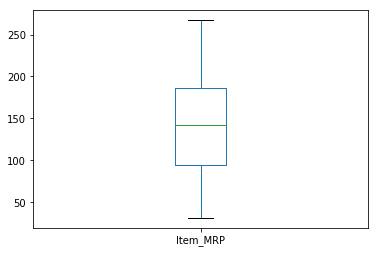

In [21]:
data['Item_MRP'].plot(kind = "box")

In [22]:
data['Item_Visibility'].describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [23]:
data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [24]:
data['Outlet_Establishment_Year'].max()

2009

In [25]:
data['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [26]:
data['Outlet_Establishment_Year'] = 2019 - data['Outlet_Establishment_Year']

In [27]:
data

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Identifier_Name
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300000,20,OUT049,Tier 1,Medium,Supermarket Type1,FDA
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920000,10,OUT018,Tier 3,Medium,Supermarket Type2,DRC
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.500000,20,OUT049,Tier 1,Medium,Supermarket Type1,FDN
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.200000,21,OUT010,Tier 3,NaN,Grocery Store,FDX
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.930000,32,OUT013,Tier 3,High,Supermarket Type1,NCD
5,Regular,FDP36,51.4008,556.6088,Baking Goods,0.000000,10.395000,10,OUT018,Tier 3,Medium,Supermarket Type2,FDP
6,Regular,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650000,32,OUT013,Tier 3,High,Supermarket Type1,FDO
7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,13.907747,34,OUT027,Tier 3,Medium,Supermarket Type3,FDP
8,Regular,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200000,17,OUT045,Tier 2,NaN,Supermarket Type1,FDH
9,Regular,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200000,12,OUT017,Tier 2,NaN,Supermarket Type1,FDU


In [28]:
data['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [29]:
data["Outlet_Size"] = data.groupby("Outlet_Location_Type").Outlet_Size.transform(lambda x: x.fillna(x.mode()[0])) 

In [30]:
data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [31]:
cato_data=data.select_dtypes(exclude=np.number)

In [32]:
one_hot_encoder = pd.get_dummies(cato_data.drop(columns='Item_Identifier'))

In [33]:
one_hot_encoder

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Item_Identifier_Name_NCQ,Item_Identifier_Name_NCR,Item_Identifier_Name_NCS,Item_Identifier_Name_NCT,Item_Identifier_Name_NCU,Item_Identifier_Name_NCV,Item_Identifier_Name_NCW,Item_Identifier_Name_NCX,Item_Identifier_Name_NCY,Item_Identifier_Name_NCZ
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
num_data=data.select_dtypes(include=np.number)

In [35]:
data_preprocessed = pd.concat([num_data,one_hot_encoder],axis='columns')

In [36]:
test=data_preprocessed[data_preprocessed['Item_Outlet_Sales'].isna()]

In [37]:
train=data_preprocessed[data_preprocessed['Item_Outlet_Sales'].notna()]

In [38]:
test.shape

(5681, 114)

In [39]:
train.shape

(8523, 114)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [41]:
linear = LinearRegression()

In [42]:
x=train.drop(columns='Item_Outlet_Sales')

In [43]:
y=train['Item_Outlet_Sales']

In [44]:
linear.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
linear.coef_

array([ 1.55675539e+01, -3.34004664e+02,  2.56604819e-01, -1.93958703e+11,
       -4.88411403e+12, -4.88411403e+12, -3.78895655e+11, -3.78895655e+11,
       -3.78895655e+11, -3.78895655e+11, -3.78895655e+11, -3.78895655e+11,
       -3.78895655e+11, -3.78895655e+11, -3.85105537e+11, -3.85105537e+11,
       -3.78895655e+11, -3.85105537e+11, -3.78895655e+11, -3.78895655e+11,
       -3.78895655e+11, -3.78895655e+11, -5.08629910e+11,  1.54331828e+12,
       -1.83584820e+11, -1.90205024e+12,  2.10514275e+12,  1.67671737e+12,
        3.98291289e+11,  7.86208695e+11, -2.84167025e+11, -6.01992614e+11,
        3.98204067e+11, -1.64196517e+12,  5.60605407e+11,  2.65843853e+11,
        2.46051650e+11,  3.16143467e+11,  4.65632297e+11,  5.27437639e+11,
       -2.74493101e+11,  8.01748162e+11,  1.19255598e+11,  1.19255598e+11,
        1.19255598e+11,  1.19255598e+11,  1.19255598e+11,  1.19255598e+11,
        1.19255598e+11,  1.19255598e+11,  1.19255598e+11,  1.19255598e+11,
        1.19255598e+11,  

# Linear Regression

In [52]:
def modal_fit(modal,x,y,x_test,fileName):
    modal.fit(x,y);
    y_train_predicated=modal.predict(x);
    print("Root Mean Square Error ",np.sqrt(mean_squared_error(y,y_train_predicated)))
    print("cross validation ::",np.sqrt(np.mean(np.abs(cross_val_score(modal,x,y,cv=20,scoring="neg_mean_squared_error")))))
    y_test_predicated = modal.predict(x_test);
    y_test_predicated_df = pd.DataFrame(y_test_predicated,columns= ["Item_Outlet_Sales"])
    result = pd.concat([test_data[['Item_Identifier','Outlet_Identifier']],y_test_predicated_df],axis=1)
    result.to_csv(fileName,index=False)
    
    

In [47]:
x_test=test.drop(columns='Item_Outlet_Sales')

In [48]:
modal_fit(linear,x,y,x_test,'linear-regression.csv')

Mean Square Error  1123.7536315786547


In [49]:
poly_reg = PolynomialFeatures(degree=2)
x_train_poly = poly_reg.fit_transform(x)
ploy_linear =  LinearRegression();
x_test_poly = poly_reg.fit_transform(x_test)

In [50]:
modal_fit(linear,x_train_poly,y,x_test_poly,"Polynominal_Regression.csv")

Mean Square Error  984.8138064085172


In [55]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet


In [58]:
lasso = Lasso(alpha=10,normalize = True)
modal_fit(lasso, x,y, x_test, "model_lasso_solution.csv" )

Mean Square Error  1681.0978716484542
cross validation :: 1668.7857675962657


In [59]:
ridge = Ridge()
modal_fit(ridge, x,y, x_test, "model_ridge_solution.csv" )

Mean Square Error  1123.7582559250652
cross validation :: 1137.5137893158028


In [60]:
elastic = ElasticNet(alpha=0.4,l1_ratio=0.5)
modal_fit(elastic, x,y, x_test, "model_elastic_solution.csv" )

Mean Square Error  1193.8628688321778
cross validation :: 1196.1686631669168
